#  A1: Gender Classifier - Logistic Regression

# Import the required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [4]:
import features_extraction_A as feA
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'features_extraction_A'

In [8]:
# extract features and labels from images by landmarks for training, validation and testing
def get_data():
    X_celeba, y_gender, y_smiling = feA.extract_features_labels(0)   # for training set      
    X_celeba_test, y_gender_test, y_smiling_test = feA.extract_features_labels(1)   # for test set         
    
    X_celeba = X_celeba.reshape(len(X_celeba), 68*2)
    X_celeba_test = X_celeba_test.reshape(len(X_celeba_test), 68*2)
    print("Get the data from feature extraction.")
    
    return X_celeba, y_gender, y_smiling, X_celeba_test, y_gender_test, y_smiling_test

In [5]:
# split data into training set and validation set
def data_split(X, y_label, test_size):
    X_train, X_val, y_train, y_val = train_test_split(X, y_label, test_size=test_size, random_state=1)   
    X_train = X_train.reshape(len(X_train), 68*2)
    X_val = X_val.reshape(len(X_val), 68*2)

    return X_train, X_val, y_train, y_val

In [6]:
# pre-processing for training, validation and test set
def data_preprocessing(test_size, y_label):
    X_celeba, y_gender, y_smiling, X_celeba_test, y_gender_test, y_smiling_test = get_data()
    X_test = X_celeba_test
    if y_label == 'gender':
        X_train, X_val, y_train, y_val = data_split(X_celeba, y_gender, test_size)
        y_test = y_gender_test
    elif y_label == 'smiling':
        X_train, X_val, y_train, y_val = data_split(X_celeba, y_smiling, test_size)
        y_test = y_smiling_test  
   
    print("Split the data into training, validation and test set.")    
    
    return X_train, X_val, X_test, y_train, y_val, y_test

In [9]:
test_size = 0.2
y_label = 'gender'  # for A1
X_train, X_val, X_test, y_train, y_val, y_test = data_preprocessing(test_size, y_label)

Get the data from feature extraction.
Split the data into training, validation and test set.


# Train the Logistic Regression Model

In [ ]:
# Method1: Build Logistic Regression Model with Optimized C by Cross Validation 
def logRegrCVPredict(x_train, y_train, x_val, cv):    
    logreg = LogisticRegressionCV(solver='liblinear', cv=cv)   # default: L2 penalty
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(x_val)
    print('Optimized C is', logreg.C_)

    return y_pred, logreg

In [ ]:
# Method2: Find Optimized C for Logistic Regression Model by GridSearchCV
def logRegrPredictCV(x_train, y_train, x_val):    
    logreg = LogisticRegression(solver='liblinear')   # default: L2 penalty
    C = [0.001, 0.004, 0.04, 0.04, 0.1, 0.4, 1, 4, 10]
    param_grid = dict(C=C)
    grid_search = GridSearchCV(logreg, param_grid, cv=3, scoring='accuracy')    
    grid_search.fit(x_train, y_train)
    
    # print dataframe  
    result = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]), pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])], axis=1)
    print(result)
    best_accuracy_score = grid_search.best_score_
    best_params = grid_search.best_params_
    print("Best: %f using %s" % (best_accuracy_score, best_params))
    
    # predict with the best classifier
    logreg_cv = grid_search.best_estimator_
    y_pred = logreg_cv.predict(x_val)
    
    return y_pred, logreg_cv 

In [ ]:
# For method1: Train the model with LogisticRegressionCV()
cv = 3     # same with 5
y_pred1, logreg = logRegrCVPredict(X_train, y_train, X_val, cv)   #solver: liblinear
print('Accuracy on validation set: ' + str(accuracy_score(y_val,y_pred1)))
print(classification_report(y_val,y_pred1))

In [ ]:
# For method2: Train the LR model with GridSearchCV()
y_pred2, logreg_cv = logRegrPredictCV(x_train, y_train, x_val)
print('Accuracy on validation set: ' + str(accuracy_score(y_val,y_pred2)))
print(classification_report(y_val,y_pred2))

# Model A1: Build the Logistic Regression Model with optimized params

In [10]:
# Model_A1: LR(solver='liblinear', C=0.04)
def model_A1(x_train, x_val, x_test, y_train):
    A1_lr = LogisticRegression(solver='liblinear', C=0.04)
    A1_lr.fit(x_train, y_train)
    y_pred_val = A1_lr.predict(x_val)
    y_pred_test = A1_lr.predict(x_test)
    
    return y_pred_val, y_pred_test, A1_lr

In [16]:
# Build and test the model_A1
y_pred_val, y_pred_test, A1_lr = model_A1(X_train, X_val, X_test, y_train)
print('Accuracy on validation set: ' + str(accuracy_score(y_val,y_pred_val)))
print('Accuracy on test set: ' + str(accuracy_score(y_test,y_pred_test)))
print('For validation set:')
print(classification_report(y_val,y_pred_val))
print('For test set:')
print(classification_report(y_test,y_pred_test))

Accuracy on validation set: 0.9177083333333333
Accuracy on test set: 0.9153766769865841
For validation set:
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.92       459
         1.0       0.94      0.90      0.92       501

    accuracy                           0.92       960
   macro avg       0.92      0.92      0.92       960
weighted avg       0.92      0.92      0.92       960

For test set:
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       488
         1.0       0.93      0.89      0.91       481

    accuracy                           0.92       969
   macro avg       0.92      0.92      0.92       969
weighted avg       0.92      0.92      0.92       969



# Plot learning curve graph

In [17]:
# Plot learning curve; developed by sklearn official document
def plot_learning_curve(estimator, X, y):
    plt.figure()
    plt.title('Learning Curve')
    plt.xlabel('Number of training examples')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y)  #train_sizes=np.linspace(.1, 1.0, 5)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")

    return plt

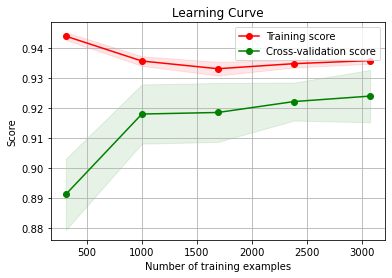

In [18]:
#plt = plot_learning_curve(logreg, X_train, y_train)     #For Method1
#plt = plot_learning_curve(logreg_cv, X_train, y_train)  #For Method2
plt = plot_learning_curve(A1_lr, X_train, y_train)       #For model_A1
plt.show()